# Week 2 Exercise B: ICP04-Gradient Descent with L2 regularization
# Name: Rodgers Okeyo Ochieng
Description: This assignment was locked May 30 at 11:59pm.
For this class assignment, you are required to create a copy of your ICP04 model fitting notebook and make specific updates to the SGDRegressor model. The objective is to explore the impact of L2 regularization on the performance of the SGDRegressor by trying different values for the regularization parameter, alpha (0.0001, 0.001, 0.01).

Begin by duplicating your existing ICP04 model fitting notebook and proceed with the necessary modifications. Update the SGDRegressor implementation to incorporate L2 regularization, as described in the official documentation. You can refer to the scikit-learn documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.htmlLinks to an external site. (Links to an external site) to understand the specific details of the L2 regularization implementation.

Within the notebook, ensure that you include the appropriate code snippets and data preprocessing steps required to integrate L2 regularization into your existing model. Train and evaluate the SGDRegressor using the same dataset as before, considering the three specified alpha values (0.0001, 0.001, 0.01). Include detailed documentation and comments to enhance the readability and understandability of your code.

In the conclusion section of the notebook, provide a comprehensive analysis of how well the SGDRegressor performed after incorporating L2 regularization. Discuss the observed performance differences compared to the previous implementation without regularization. Evaluate and compare the results obtained using each of the three alpha values (0.0001, 0.001, 0.01), highlighting the strengths and weaknesses of each. Analyze the impact of L2 regularization on the model's ability to generalize and control overfitting or underfitting.

Ensure that your conclusion is supported by relevant evaluation metrics and visualizations, if applicable. Clearly communicate your findings regarding the effectiveness of the different alpha values and identify the alpha that performed the best for the given dataset and task.

When submitting your assignment, include both the original ICP04 model fitting notebook and the updated notebook that incorporates the SGDRegressor with L2 regularization. This will enable us to review your progress and assess your understanding of the concepts covered in the class.

Please feel free to reach out if you have any questions or require further assistance. Good luck with your analysis!
6. Save model

## Step 1: Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(8085)

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('model4dataset.csv')
df = df.rename(columns={'input':'X', 'target':'y'})
df.head

<bound method NDFrame.head of              X             y
0    16.243454   4254.268313
1    -6.117564   -466.079771
2    -5.281718    -91.259927
3   -10.729686  -1256.937955
4     8.654076    488.365975
..         ...           ...
995  -1.164441     18.445547
996 -22.772980 -11731.400655
997  -0.696245    -91.811265
998   3.538704    105.514465
999  -1.869550    134.015065

[1000 rows x 2 columns]>

# Let me add some noise

In [3]:
df['X'] = df['X']+ np.random.normal(0, 10, len(df['X']))

df.head(3)

,X,y
0,12.663937,4254.268313
1,-25.371722,-466.079771
2,-2.763725,-91.259927


## Create New Columns
Create new columns to the table for the second and third polynomial

In [4]:
df['X2'] = df['X']**2 #add column for x2
df['X3'] = df['X']**3 #add column for x3
df.head

<bound method NDFrame.head of              X             y          X2            X3
0    12.663937   4254.268313  160.375303   2030.982756
1   -25.371722   -466.079771  643.724299 -16332.394248
2    -2.763725    -91.259927    7.638175    -21.109816
3   -27.358594  -1256.937955  748.492649 -20477.706268
4     8.768046    488.365975   76.878625    674.075292
..         ...           ...         ...           ...
995  -0.735436     18.445547    0.540867     -0.397773
996 -20.615557 -11731.400655  425.001177  -8761.635867
997  -9.800241    -91.811265   96.044722   -941.261416
998  -3.663032    105.514465   13.417801    -49.149832
999 -17.599367    134.015065  309.737703  -5451.187365

[1000 rows x 4 columns]>

In [5]:
df = df.reindex({'X','X2','X3','y'}, axis=1)
df.head

<bound method NDFrame.head of                 y          X2            X3          X
0     4254.268313  160.375303   2030.982756  12.663937
1     -466.079771  643.724299 -16332.394248 -25.371722
2      -91.259927    7.638175    -21.109816  -2.763725
3    -1256.937955  748.492649 -20477.706268 -27.358594
4      488.365975   76.878625    674.075292   8.768046
..            ...         ...           ...        ...
995     18.445547    0.540867     -0.397773  -0.735436
996 -11731.400655  425.001177  -8761.635867 -20.615557
997    -91.811265   96.044722   -941.261416  -9.800241
998    105.514465   13.417801    -49.149832  -3.663032
999    134.015065  309.737703  -5451.187365 -17.599367

[1000 rows x 4 columns]>

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

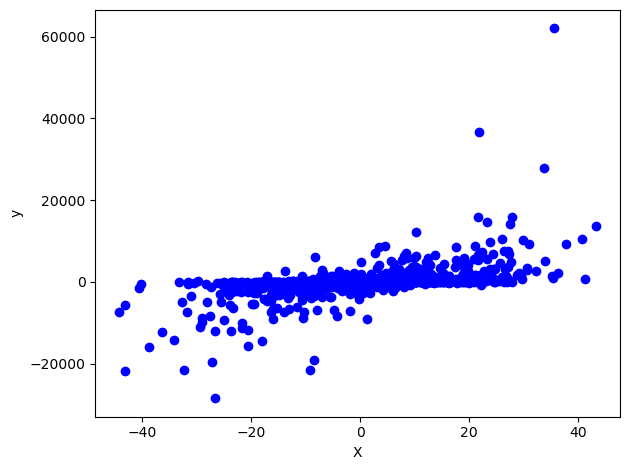

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['X'],df['y'], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Fit the models


In [7]:
### split data into Training and Testing
X = df[['X','X2','X3']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8085)

In [8]:
y_test.shape

(200,)

In [9]:
X_test.shape

(200, 3)

## Fit the linear model 

In [44]:
lin_reg=LinearRegression().fit(X_train, y_train)
y_predlin = lin_reg.predict(X_test)

In [45]:
rmse_lin = mean_squared_error(y_test, lin_reg.predict(X_test)) **0.5

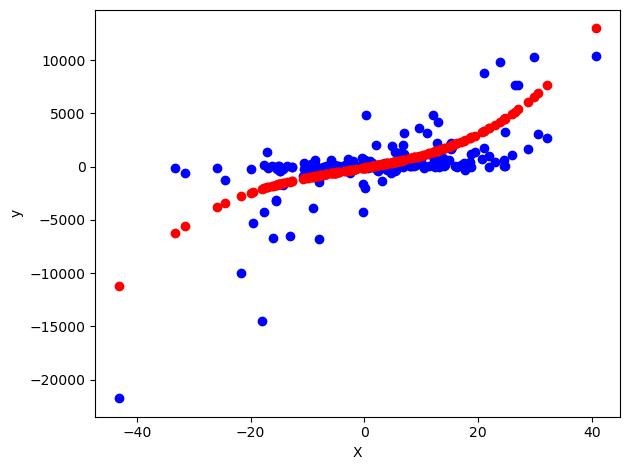

In [46]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_predlin, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Fit the model using the SGDRegressor

In [48]:
sgd_reg = SGDRegressor(alpha=0, eta0=1e-8, max_iter=1000)
_=sgd_reg.fit(X_train,y_train)
y_predsgd = sgd_reg.predict(X_test)

In [49]:
rmse_sgd = mean_squared_error(y_test,sgd_reg.predict(X_test)) **0.5

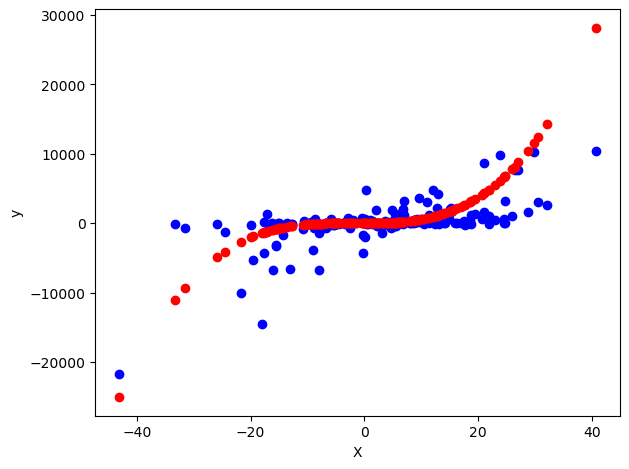

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_predsgd, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Fit the model using the SGDRegressor with L2 regularization

## alpha = 0.0001

In [28]:
sgd_rega0001 = SGDRegressor(alpha=0.0001, eta0=1e-8, penalty = 'l2', max_iter=1000)
_=sgd_reg.fit(X_train,y_train)
y_preda0001 = sgd_reg.predict(X_test)

In [29]:
rmse_a0001= mean_squared_error(y_test, y_preda0001) **0.5

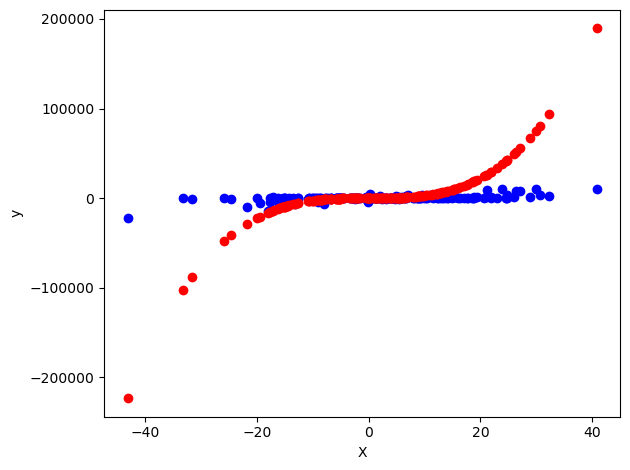

In [30]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_preda0001, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## alpha = 0.001

In [33]:
sgd_rega001 = SGDRegressor(alpha=0.001, eta0=1e-8, penalty = 'l2', max_iter=1000)
_=sgd_reg.fit(X_train,y_train)
y_preda001 = sgd_reg.predict(X_test)

In [34]:
rmse_a001= mean_squared_error(y_test, y_preda001) **0.5

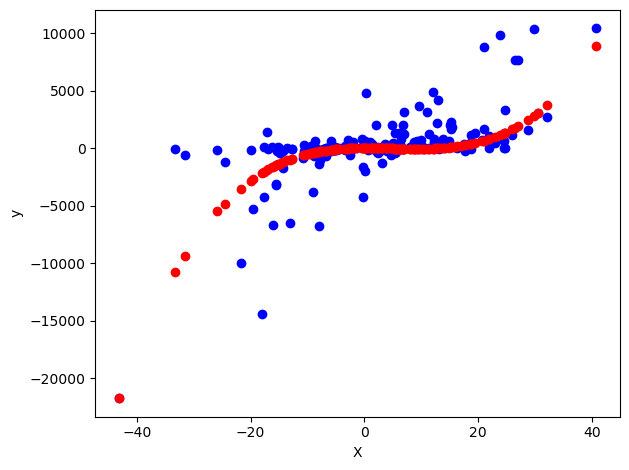

In [35]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_preda001, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## alpha = 0.01

In [36]:
sgd_rega01 = SGDRegressor(alpha=0.01, eta0=1e-8, penalty = 'l2', max_iter=1000)
_=sgd_reg.fit(X_train,y_train)
y_preda01 = sgd_reg.predict(X_test)

In [37]:
rmse_a01= mean_squared_error(y_test, y_preda01) **0.5

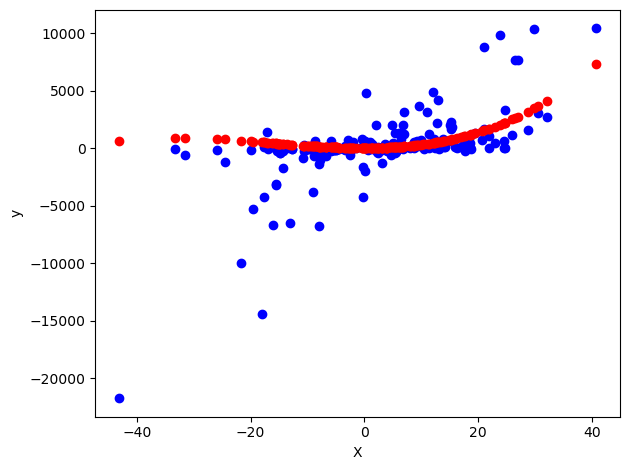

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_preda01, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

# Conclusion

In [54]:
print("RMSE Results")
print(f"Linear model: {rmse_lin:,.2}")
print(f"SGD model: {rmse_sgd:,.2}")
print(f"SGD alpha 0.0001: {rmse_a0001:,.2}")
print(f"SGD alpha 0.001: {rmse_a001:,.2}")
print(f"SGD alpha 0.01: {rmse_a01:,.2}",)

RMSE Results
Linear model: 2.3e+03
SGD model: 3e+03
SGD alpha 0.0001: 2.7e+04
SGD alpha 0.001: 2.3e+03
SGD alpha 0.01: 2.7e+03


The linear model performed better than the other three models since it has the lowest RMSE. When looking at the regularized L2 models, the L2 model with an alpha of 0.01 performed better than the other two models. This is because it has the lowest RMSE. The unregularized SGD model performed the poorest.